In [ ]:
 import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
path = '/content/2.jpg'

In [ ]:
img = cv2.imread(path)

In [ ]:
img = cv2.resize(img, (0,0),None,0.5,0.5)

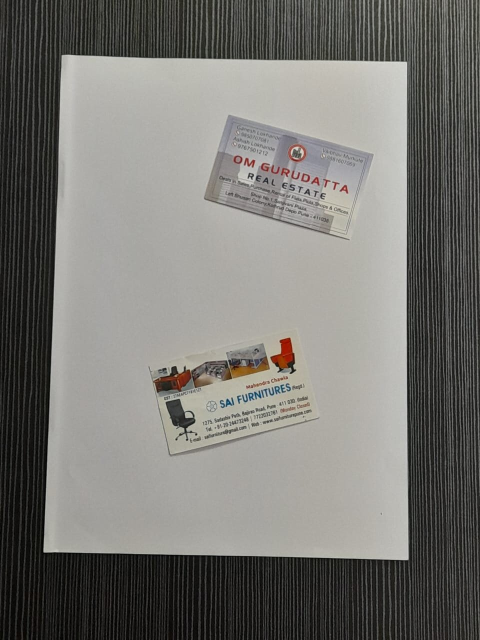

In [ ]:
cv2_imshow(img)

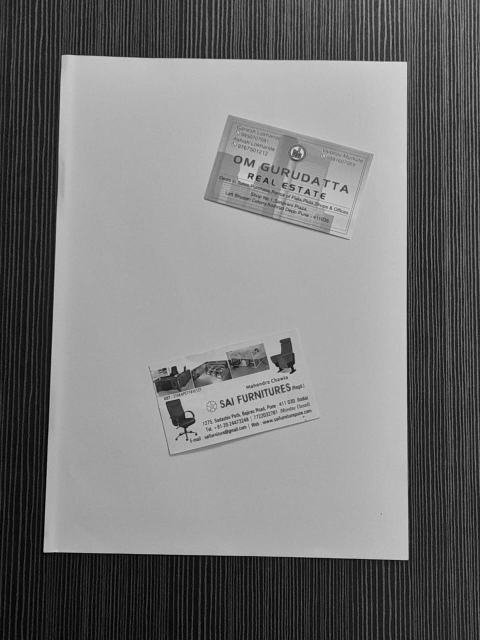

In [ ]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgGray)

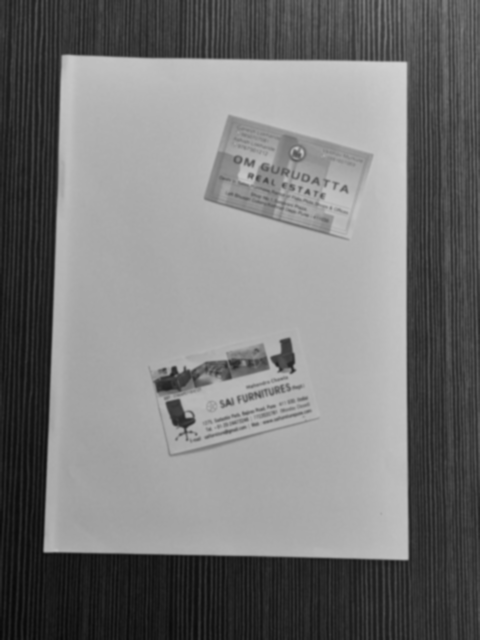

In [ ]:
imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
cv2_imshow(imgBlur)

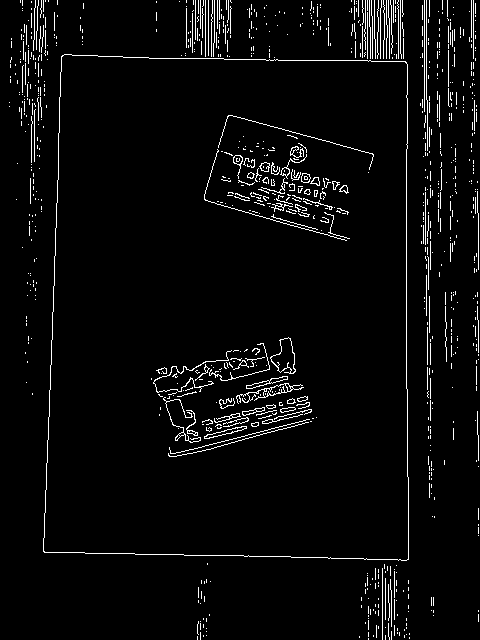

In [ ]:
imgCanny = cv2.Canny(imgBlur, 100,100)
cv2_imshow(imgCanny)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


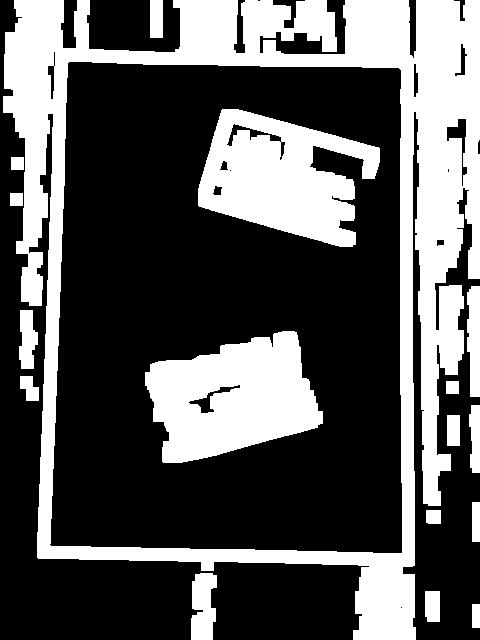

In [ ]:
kernel = np.ones((5,5))
print(kernel)
imgDial = cv2.dilate(imgCanny,kernel,iterations=3)
cv2_imshow(imgDial)

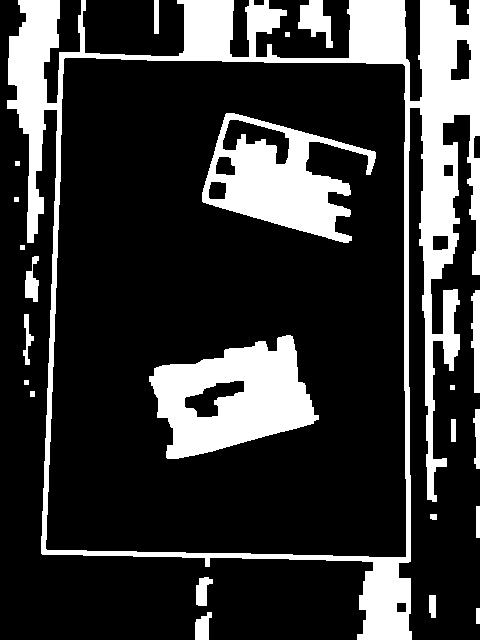

In [ ]:
imgThreshold = cv2.erode(imgDial,kernel,iterations=2)
cv2_imshow(imgThreshold)

In [ ]:
contours,hierachy = cv2.findContours(imgThreshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(contours)

[array([[[207, 612]],

       [[207, 615]],

       [[206, 616]],

       [[201, 616]],

       [[201, 618]],

       [[200, 619]],

       [[196, 619]],

       [[196, 621]],

       [[195, 622]],

       [[195, 639]],

       [[208, 639]],

       [[208, 618]],

       [[209, 617]],

       [[211, 617]],

       [[211, 612]]], dtype=int32), array([[[476, 608]],

       [[476, 623]],

       [[479, 623]],

       [[479, 608]]], dtype=int32), array([[[429, 595]],

       [[429, 612]],

       [[430, 612]],

       [[431, 613]],

       [[431, 617]],

       [[435, 617]],

       [[435, 595]]], dtype=int32), array([[[204, 577]],

       [[203, 578]],

       [[199, 578]],

       [[199, 584]],

       [[198, 585]],

       [[196, 585]],

       [[196, 604]],

       [[197, 604]],

       [[198, 605]],

       [[206, 605]],

       [[206, 585]],

       [[207, 584]],

       [[208, 584]],

       [[209, 583]],

       [[212, 583]],

       [[212, 579]],

       [[209, 579]],

       [[20

In [ ]:
print(hierachy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [-1 19 -1 -1]]]


In [ ]:
minArea = 1000
finalContours = []
filter = 4
for i in contours: 
  area = cv2.contourArea(i)
  print(area)
  
  if area > minArea:
    print("-----------------")
    perimeter = cv2.arcLength(i,True)
    print(perimeter)
    approx = cv2.approxPolyDP(i,0.02*perimeter,True)  #To find the corner points
    print("%%%%%%%%%%%%%")
    print(approx)
    bbox = cv2.boundingRect(approx)
    print(type(bbox))
    if filter > 0:
      if len(approx) == filter:
        finalContours.append([len(approx),area,approx,bbox,i])
      else:
        finalContours.append([len(approx),area,approx,bbox,i])
print(finalContours)

299.0
45.0
122.5
282.0
28.5
93.0
88.0
224.5
20.0
16.0
16.0
179.0
594.5
323.5
16.0
16.0
16.0
16.0
835.5
132.0
211032.0
-----------------
5057.8132700920105
%%%%%%%%%%%%%
[[[ 18   0]]

 [[ 41 553]]

 [[411 639]]

 [[479   0]]

 [[ 56 103]]]
<class 'tuple'>
[[5, 211032.0, array([[[ 18,   0]],

       [[ 41, 553]],

       [[411, 639]],

       [[479,   0]],

       [[ 56, 103]]], dtype=int32), (18, 0, 462, 640), array([[[18,  0]],

       [[18,  4]],

       [[19,  4]],

       ...,

       [[57, 18]],

       [[59, 18]],

       [[59,  0]]], dtype=int32)]]


In [ ]:
print(type(approx))

<class 'numpy.ndarray'>


In [ ]:
for i in approx:
  print(i)
  print(i[0])
  print(i[0][0])
  print(i[0][1])

[[18  0]]
[18  0]
18
0
[[ 41 553]]
[ 41 553]
41
553
[[411 639]]
[411 639]
411
639
[[479   0]]
[479   0]
479
0
[[ 56 103]]
[ 56 103]
56
103


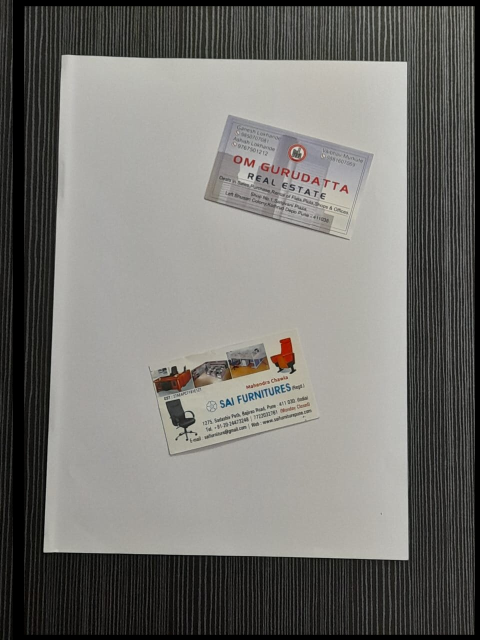

In [ ]:
x,y,w,h = bbox
cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 0), 10, cv2.LINE_AA)
cv2_imshow(img)

In [ ]:
print(finalContours)

[[5, 211032.0, array([[[ 18,   0]],

       [[ 41, 553]],

       [[411, 639]],

       [[479,   0]],

       [[ 56, 103]]], dtype=int32), (18, 0, 462, 640), array([[[18,  0]],

       [[18,  4]],

       [[19,  4]],

       ...,

       [[57, 18]],

       [[59, 18]],

       [[59,  0]]], dtype=int32)]]


In [ ]:
finalContours = sorted(finalContours,key=lambda x:x[1],reverse=True)
print(finalContours)

[[5, 211032.0, array([[[ 18,   0]],

       [[ 41, 553]],

       [[411, 639]],

       [[479,   0]],

       [[ 56, 103]]], dtype=int32), (18, 0, 462, 640), array([[[18,  0]],

       [[18,  4]],

       [[19,  4]],

       ...,

       [[57, 18]],

       [[59, 18]],

       [[59,  0]]], dtype=int32)]]


In [ ]:
draw = True
if draw:        
  for con in finalContours:          
    print(cv2.drawContours(img,con[4],-1,(0,0,255),3))

[[[ 35  39  40]
  [ 53  57  58]
  [ 53  57  58]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[ 37  41  42]
  [ 50  54  55]
  [ 53  57  58]
  ...
  [  0   0   0]
  [  0   0 255]
  [  0   0 255]]

 [[ 43  47  48]
  [ 58  62  63]
  [ 58  62  63]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0 255]]

 ...

 [[ 10  16  15]
  [  0   4   3]
  [  9  14  13]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 10  16  15]
  [  3   9   8]
  [ 18  23  22]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  3   8   7]
  [  4  10   9]
  [ 24  29  28]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
print(finalContours[0][2])

[[[ 18   0]]

 [[ 41 553]]

 [[411 639]]

 [[479   0]]

 [[ 56 103]]]


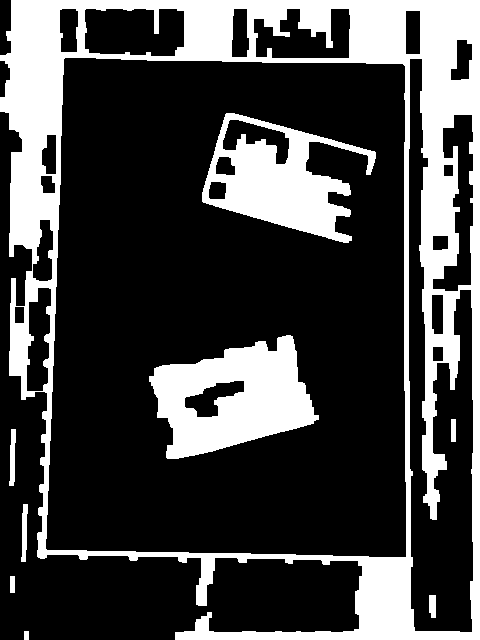

In [ ]:
def getContours(img,cThr = [100,100], showCanny=False,minArea = 1000, filter = 0,draw=False):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Colour image to grayscale
    imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)   #Gaussian Blur
    imgCanny = cv2.Canny(imgBlur, cThr[0],cThr[1])  #Canny Edge Detection
    kernel = np.ones((5,5))
    imgDial = cv2.dilate(imgCanny,kernel,iterations=3)   #Image dialation
    imgThreshold = cv2.erode(imgDial,kernel,iterations=2)
    #imgThreshold = cv2.resize(imgThreshold, (0, 0), None, 0.5, 0.5)
    if showCanny:cv2_imshow(imgThreshold)

    contours,hierachy = cv2.findContours(imgThreshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    finalContours = []
    for i in contours:
        area = cv2.contourArea(i)
        if area > minArea:
            perimeter = cv2.arcLength(i,True)
            approx = cv2.approxPolyDP(i,0.02*perimeter,True)  #To find the corner points
            bbox = cv2.boundingRect(approx)
            if filter > 0:
                if len(approx) == filter:
                    finalContours.append([len(approx),area,approx,bbox,i])
            else:
                finalContours.append([len(approx),area,approx,bbox,i])
    
    finalContours = sorted(finalContours,key=lambda x:x[1],reverse=True)
    
    if draw:
        for con in finalContours:
            cv2.drawContours(img,con[4],-1,(0,0,255),3)
    
    return img, finalContours

img,conts = getContours(img,showCanny = True, minArea=50000,filter=4, draw = True)
   

In [ ]:
print(conts)

[[4, 267129.0, array([[[ 11,   0]],

       [[ 37, 556]],

       [[479, 639]],

       [[479,   0]]], dtype=int32), (11, 0, 469, 640), array([[[ 11,   0]],

       [[ 11,  30]],

       [[ 10,  31]],

       [[  6,  31]],

       [[  6,  35]],

       [[  7,  36]],

       [[  7,  40]],

       [[ 10,  40]],

       [[ 11,  41]],

       [[ 11,  52]],

       [[ 10,  53]],

       [[  7,  53]],

       [[  5,  55]],

       [[  0,  55]],

       [[  0,  60]],

       [[  4,  60]],

       [[  5,  61]],

       [[  5,  63]],

       [[  7,  63]],

       [[  8,  64]],

       [[  8,  67]],

       [[  9,  67]],

       [[ 10,  68]],

       [[ 10,  79]],

       [[  9,  80]],

       [[  6,  80]],

       [[  6,  82]],

       [[  5,  83]],

       [[  5,  96]],

       [[  4,  97]],

       [[  0,  97]],

       [[  0, 111]],

       [[  4, 111]],

       [[  5, 112]],

       [[  8, 112]],

       [[  9, 113]],

       [[  9, 129]],

       [[ 14, 129]],

       [[ 16, 131]],

      

In [ ]:
len(conts)
biggest = finalContours[0][2]
print(biggest)

[[[ 18   0]]

 [[ 41 553]]

 [[411 639]]

 [[479   0]]

 [[ 56 103]]]


In [ ]:
def reorder(myPoints):
    print(myPoints.shape)
    myPointsNew = np.zeros_like(myPoints)
    myPoints = myPoints.reshape((4,2))
    add = myPoints.sum(1)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints,axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    return myPointsNew

In [ ]:
def reorder_(myPoints):
    print(myPoints.shape)
    myPointsNew = np.zeros_like(myPoints)
    myPoints = np.delete(myPoints,4, axis=0)
    myPoints = myPoints.reshape((4,2))
    add = myPoints.sum(1)
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints,axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    return myPointsNew

In [ ]:
def warpImg(img,points,w,h,pad=20):
    #print(points)
    points = (reorder(points))
    pts1 = np.float32(points)
    print(pts1)
    pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])
    print(pts2)
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    imgWarp = cv2.warpPerspective(img,matrix,(w,h))
    imgWarp = imgWarp[pad:imgWarp.shape[0]-pad,pad:imgWarp.shape[1]-pad]

    return imgWarp

In [ ]:
def warpImg_(img,points,w,h,pad=20):
    #print(points)
    points = (reorder_(points))
    points = np.delete(points,4,axis=0)
    pts1 = np.float32(points)
    print(pts1)
    pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])
    print(pts2)
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    imgWarp = cv2.warpPerspective(img,matrix,(w,h))
    imgWarp = imgWarp[pad:imgWarp.shape[0]-pad,pad:imgWarp.shape[1]-pad]

    return imgWarp

In [ ]:
def findDis(pts1,pts2):
    return ((pts2[0]-pts1[0])**2 + (pts2[1]-pts1[1])**2)**0.5

In [ ]:
scale = 0.95
wP = int(210/scale)
hP = int(296/scale)

In [ ]:
imgWarp = warpImg_(img, biggest,wP,hP)

(5, 1, 2)
[[[ 18.   0.]]

 [[479.   0.]]

 [[ 41. 553.]]

 [[411. 639.]]]
[[  0.   0.]
 [221.   0.]
 [  0. 311.]
 [221. 311.]]


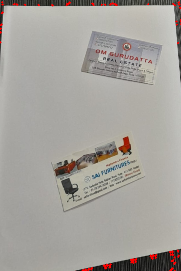

In [ ]:
cv2_imshow(imgWarp)

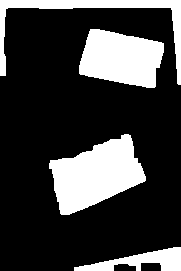

In [ ]:
img2, conts2 = getContours(imgWarp,showCanny = True, minArea=2000, filter=4,cThr=[50,50],draw=True)

In [ ]:
len(conts2)

2

In [ ]:
conts2[0]

[4, 4528.5, array([[[130, 135]],
 
        [[ 50, 160]],
 
        [[ 61, 214]],
 
        [[145, 180]]], dtype=int32), (50, 135, 96, 80), array([[[124, 134]],
 
        [[123, 135]],
 
        [[121, 135]],
 
        [[121, 138]],
 
        [[120, 139]],
 
        [[110, 139]],
 
        [[108, 141]],
 
        [[107, 141]],
 
        [[106, 142]],
 
        [[104, 142]],
 
        [[102, 144]],
 
        [[ 98, 144]],
 
        [[ 97, 145]],
 
        [[ 94, 145]],
 
        [[ 93, 146]],
 
        [[ 93, 149]],
 
        [[ 91, 151]],
 
        [[ 86, 151]],
 
        [[ 85, 152]],
 
        [[ 82, 152]],
 
        [[ 81, 153]],
 
        [[ 80, 153]],
 
        [[ 78, 155]],
 
        [[ 77, 155]],
 
        [[ 75, 157]],
 
        [[ 74, 157]],
 
        [[ 73, 158]],
 
        [[ 62, 158]],
 
        [[ 61, 159]],
 
        [[ 58, 159]],
 
        [[ 57, 160]],
 
        [[ 50, 160]],
 
        [[ 50, 162]],
 
        [[ 49, 163]],
 
        [[ 49, 168]],
 
        [[ 51, 168]],


(4, 1, 2)
8.8 5.8
(4, 1, 2)
7.8 4.8


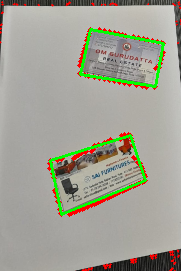

In [ ]:
if len(conts2) != 0:
  for obj in conts2:
    cv2.polylines(img2,[obj[2]],True,(0,255,0),2)
    nPoints = reorder(obj[2])
    dist1 = (findDis(nPoints[0][0]//scale,nPoints[1][0]//scale))/10            
    dist2 = (findDis(nPoints[0][0] // scale, nPoints[2][0] // scale)) / 10
    nW = round(dist1,1)
    nH = round(dist2,1)
    print(nW,nH)
cv2_imshow(img2)